In [3]:
%matplotlib inline

# 2. Knowing Your Data

###* Importing data from CSV
###* Importing data from Microsoft Excel files
###* Importing data from fixed-width datafiles
###* Importing data from tab-delimited files
###* Importing data from JSON resource
###* Exporting data to JSON, CSV, and Excel
###* Importing data from a database
###* Cleaning up data from outliers
###* Reading files in chunks
###* Reading streaming data sources
###* Importing image data into NumPy arrats
###* Generating Controlled random datasets
###* Smoothing the noise in real-world data

## =======================================================

### 1. Open the ch02-data.csv file for reading.
### 2. Read the header first.
### 3. Read the rest of the rows.
### 4. In case there is an error, raise an exception.
### 5. After reading everything. print the header and the rest of the rows.

In [1]:
import os
os.getcwd()

'C:\\Users\\Encaion\\Desktop\\Python_2'

In [73]:
%matplotlib inline

## CSV 데이터 읽어오기

In [1]:
for i in range(5):
    print i

0
1
2
3
4


In [2]:
[i for i in range(5)]

[0, 1, 2, 3, 4]

큰 CSV 파일은 numpy의 loadtxt가 더 좋음.

In [2]:
import numpy as np
data = np.loadtxt('ch02-data.csv', dtype='string', delimiter=',')

In [3]:
data

array([['a', 'b', 'c'],
       ['1', '2', '3'],
       ['2', '3', '4'],
       ['3', '4', '5'],
       ['4', '5', '6'],
       ['5', '6', '7']], 
      dtype='|S1')

In [18]:
# numpy.loadtxt는 numpy.genformtxt보다 약간더 빠르지만 결측값에 대응(cope)하기에는 genformtxt가 더 나음.
# 파이썬 2.X버전은 Unicode가 지원되지 않기 때문에 데이터 처리시 유의할 것!

## 엑셀 데이터 읽어오기

In [21]:
import xlrd as excel_read

file = 'ch02-xlsxdata.xlsx'

wb = excel_read.open_workbook(filename = file) # wb : work book

ws = wb.sheet_by_name('Sheet1') # ws : work sheet

dataset = [] # 왜 미리 비어있는 객체를 생성해주어야 하는가?

for r in xrange(ws.nrows):
    col = []
    for c in range(ws.ncols) :
        col.append(ws.cell(r, c).value)
    dataset.append(col)
    
from pprint import pprint
pprint(dataset)

[[u'a', u'b', u'c', u'd'],
 [1.0, 10.0, 3.0, 2.718281828459045],
 [2.0, 20.0, 6.0, 7.38905609893065],
 [3.0, 30.0, 9.0, 20.085536923187668],
 [4.0, 40.0, 12.0, 54.598150033144236],
 [5.0, 50.0, 15.0, 148.4131591025766],
 [6.0, 60.0, 18.0, 403.4287934927351]]


In [23]:
help(dataset.append)

Help on built-in function append:

append(...)
    L.append(object) -- append object to end



In [24]:
dataset # 뭐가 다르지??

[[u'a', u'b', u'c', u'd'],
 [1.0, 10.0, 3.0, 2.718281828459045],
 [2.0, 20.0, 6.0, 7.38905609893065],
 [3.0, 30.0, 9.0, 20.085536923187668],
 [4.0, 40.0, 12.0, 54.598150033144236],
 [5.0, 50.0, 15.0, 148.4131591025766],
 [6.0, 60.0, 18.0, 403.4287934927351]]

## 고정너비 구분(??) 데이터파일(fixed-width datafiles) 읽어오기

In [3]:
import string
import random

ROWS = 1000000
#SAMPLE = string.ascii_lowercase
SAMPLE = '012345678901234567890123456'
F1 = 9
F2 = F1 + 13
F3 = F2 + 4

# assert F1 + F2 + F3 == len(SAMPLE)


# for r in range(ROWS):
#    t = ''.join(random.sample(SAMPLE,len(SAMPLE)))
#    print t[0:F1], t[F1:F2], t[F2:F3]


In [4]:
import struct
import string

In [5]:
datafile = 'ch02-fixed-width-1M.data'

this is where we define how to
understand line of data from the file

In [19]:
mask = "9s14s5s" # s는 string, d?

with open(datafile, 'r') as f:
    for _ in range(10): # 언더바...는 변수로 사용가능...
        line = f.readline()
    # for line in f: # 위험함.
        fields = struct.Struct(mask).unpack_from(line)
        print 'fields: ', [field.strip() for field in fields]

error: unpack_from requires a buffer of at least 64 bytes

In [18]:
fields = struct.unpack_from(mask, line)
fields

('138359697', ' 3286515244210', ' 7400')

## 탭 구분자 파일 읽어오기

In [20]:
import csv
filename = 'ch02-data.tab'
data = []

In [22]:
try:
    with open(filename) as f:
        reader = csv.reader(f, dialect=csv.excel_tab)
        header = reader.next()
        data = [row for row in reader]
except csv.Error as e:
    print "Error reading CSV file at line %s: %s" % (reader.line_num, e)
    sys.exit(-1)
    
if header:
    print header
    print "====================="
    
for datarow in data:
    print datarow

['day   "ammount"']
['2013-01-24  323']
['2013-01-25  233']
['2013-01-26  433']
['2013-01-27  555']
['2013-01-28  123']
['2013-01-29    0']
['2013-01-30  221']


## Importing data from a JSON resource

In [35]:
from IPython.display import Image

In [37]:
import requests

# url = 'https://github.com/timeline.json' # out of date

url = 'https://api.github.com/users/encaion'

r = requests.get(url)
json_obj = r.json()

Image(url=json_obj['avatar_url'])

예를 들어, json.load()는 float를 파이썬의 float형태로 파싱합니다. 웬만하면 그냥 사용해도 문제가 없지만 가끔 금전적인 가치를 나타낼 때에는 decimal 타입이 표현면에서 더 좋습니다.

In [40]:
jstring = '{"name":"prod1","price":12.50}'
jstring

'{"name":"prod1","price":12.50}'

In [41]:
from decimal import Decimal
json.loads(jstring, parse_float=Decimal)

{u'name': u'prod1', u'price': Decimal('12.50')}

## Exporting data to JSON, CSV, and Excel

1. import the required modules.

In [32]:
import os
import sys
import argparse

try:
    import cStringIO as StringIO
except:
    import StringIO
import struct
import json
import csv

 2, Then, define the appropriate functions for reading and writing data. 

In [33]:
def import_data(import_file):
    '''
    Imports data from Import_file.
    Expects to find fixed width row
    Sample row: 161322597 0386544351896 0042
    '''
    mask = '9s14s5s'
    data = []
    with open(import_file, 'r') as f:
        for line in f:
            # unpack line to tuple
            fields = struct.Struct(mask).unpack_from(line)
            # strip any whitespace for each field
            # pack everything in a list and add to full dataset
            data.append(list([f.strip() for f in fields]))
    return data

# 한글이 안될 수 있음
def write_data(data, export_format):
    '''
    Dispatches call to a specific transformer and returns data set.
    Exception is xlsx where we have to save data in a file.
    '''
    if export_format == 'csv':
        return write_csv(data)
    elif export_format == 'json':
        return write_json(data)
    elif export_format == 'xlsx':
        return write_xlsx(data)
    else:
        raise Exception("Illigal format defined")

3, We separately specify separate implementation for each data format(CSV, JSON, and XLSX).

In [46]:
def write_csv(data):
    '''
    Transforms data into csv. Returns csv as string.
    '''
    # Using this to simulate file IO,
    # as csv can only write to files.
    f = StringIO.StringIO()
    writer = csv.writer(f)
    for row in data:
        writer.writerow(row)
    # Get the content of the file-like object
    return f.getvalue()

def write_json(data):
    '''
    Transforms data into json. Very straightforward.
    '''
    j = json.dumps(data)
    return j

def write_xlsx(data):
    '''
    Writes data into xlsx file
    '''
    from xlwt import Workbook
    book = Workbook()
    sheet1 = book.add_sheet("Sheet 1")
    row = 0
    for line in data:
        col = 0
        for datum in line:
            print datum
            sheet1.write(row, col, datum)
            col += 1
        row += 1
    # We have hard limit here of 65535 rows
    # that we are able to save in spreadsheet.
        if row > 65535:
            print >> sys.stderr, "Hit limit of # of rows in one sheet(65535)."
            break
    # XLS is special case where we have to
    # save the fole and just return 0 
    f = StringIO.StringIO()
    book.save(f)
    return f.getvalue()

4, Finally, we have the main code entry point, where we parse argument-like files from the command line to import data and export it to the required format.

In [49]:
# 노트북에서 안됨미당.
if __name__ == '__main__':  # 언더바 2개는 내부 함수??
    # parse input arguments
    parser = argparse.ArgumentParser()
    parser.add_argument("import_file", help="Export format: json, csv, xlsx.")
    args = parser.parse_args()
    
    if args.import_file is None:
        print >> sys.stderr, "You myst specify path to import from."
        sys.exit(1)
        
    if args.export_format not in ('csv', 'json', 'xlsx'):
        print >> sys.stderr, "You must provide valid export file format."
        sys.exit(1)
        
    # read from formated fixed-width file
    data = import_data
    
    # export data to specified format
    # to make this Unis-lixe pipe-able
    # we just print to stdout
    print write_data(data, args.export_format)

usage: __main__.py [-h] import_file
__main__.py: error: unrecognized arguments: -f --profile-dir C:\Users\Encaion\.ipython\profile_default


SystemExit: 2

To exit: use 'exit', 'quit', or Ctrl-D.


## Importing data from a database

In [29]:
import sqlite3

In [30]:
sqlite3.version

'2.6.0'

In [31]:
sqlite3.sqlite_version

'3.6.21'

In [ ]:
import sqlite3
import sys

if len(sys.argv) < 2:
    print "Error: You must supply at least SQL script."
    print "Usage : %s table.db ./sql-dump.sql" % (sys.argv[0])
    sys.exit(1)
    
script_path = sys.argv[1]

if len(sys.argv) == 3:
    db = sys.argv[2]
else:
    # if DB is not defined
    # create memory database
    db = ":memory:"
    
try:
    con = sqlite3.connect(db)
    with con:
        cur = con.cursor()
        with open(script_path, 'rb') as f:
            cur.executescript(f.read())
except sqlite3.Error as err:
    print "Error occured: %s" % err
        
    
    
    
    
    

In [ ]:
import sqlite3
import sys

if len(sys.argv) != 2:
    print "Please specify database file"
    sys.exit(1)
    
db = sys.argv[1]

try:
    con = sqlite3.connect(db)
    with con:
        cur = con.cursor()
        query = 'SELECT ID, Name, Population FROM City ORDER BY Population DESC LIMIT 1000'
        con.text_factory = str
        cur.execute(query)
        
        resultest = cur.fetchall()
        
        # extract column names
        
        col_names = [cn[0] for cn in cur.description]
        print "%10s %30s %10s" % row
except sqlite3.Error as err:
    print "[ERROR]:", err

## Cleaning up data from outliers

1. Generate normally distributed random data.
2. Add in a few outliers
3. Use the function is_outlier() to detect the outliers.
4. Plot both the datasets(x and filtered) to see the difference.

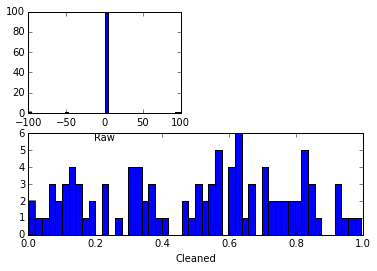

In [80]:
import numpy as np
import matplotlib.pyplot as plt

def is_outlier(points, threshhold=3.5):
    """
    Returns a boolean array with True if points are outliers and False
    otherwise.
    
    Data points with a modified z-score greater than this
    # value will be classified as outliers.
    """
    # transform into vector
    if len(points.shape) == 1:
        points = points[:,None]
        
    # compute median value
    median = np.median(points, axis=0)
    
    # compute diff sums along the axis
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    # compute MAD
    med_abs_deviation = np.median(diff)
    
    # compute modified Z-score
    # http://www.itl.nist.gov/div898/handbook/eda/section4/eda43.htm
    # Iglewicz <-- ???
    modified_z_score = 0.6745 * diff / med_abs_deviation
    
    # return a mask for each outlier
    # return modified_z_score > threshold # <-- 왜 이 명령어가 제대로 실행이 되지 않는가?
    return modified_z_score > 3.5

# Random data
x = np.random.random(100)

# histogram buckets
buckets = 50

# Add in a few outliers
x = np.r_[x, -49, 95, 100, -100]

# Keep valid data points
# Note here that
# '~' is logical NOT on boolean numpy arrays
filtered = x[~is_outlier(x)]

# plot histograms
plt.figure()

plt.subplot(221)
plt.hist(x, buckets)
plt.xlabel('Raw')

plt.subplot(212)
plt.hist(filtered, buckets)
plt.xlabel('Cleaned')

plt.show()

In [48]:
from pylab import *

# fake up some data
spread= rand(50) * 100
center = ones(25) * 50

# generate some outliers high and low
flier_high = rand(10) * 100 + 100
flier_low = rand(10) * -100

# merge generated data set
data = concatenate((spread, center, flier_high, flier_low), 0)

subplot(311)
# basic plot
# 'gx' defining the outlier plotting properties
boxplot(data, 0, 'gx')

# compare this with similar scatter plot
subplot(312)
spread_1 = concatenate((spread, flier_high, flier_low), 0)
center_1 = ones(70) * 25
scatter(center_1, spread_1)
xlim([0, 50])

show()

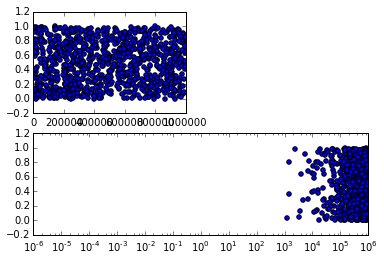

In [79]:
# generate uniform data points
x = 1e6*rand(1000)
y = rand(1000)

figure()

# creage first subplot
subplot(221)
# make scatter plot
scatter(x, y)
# limit x axis
xlim(1e-6, 1e6)

# create second subplot
subplot(212)
# make scatter plot
scatter(x,y)
# but make x axis logarithmic
xscale('log')
# set same x axis limit
xlim(1e-6, 1e6)

show()

## Reading files in chunks

In [51]:
with open('/tmp/my_big_file', 'r') as bigfile:
    for line in bigfile:
        # line based operation, like 'print line'

IndentationError: expected an indented block (<ipython-input-51-d08c5d51d7ae>, line 3)

In [52]:
import sys

# filename = sys.argv[1] # must pass valid file name
filename = 'myhugefile.dat'

with open(filename, 'rb') as hugefile:
    chunksize = 1000
    readable = ''
    # if you want to stop after certain number of blocks
    # put condition in the while
    while hugefile:
        # if you want to start nor from 1st byte
        # do a hugefile.seek(skipbytes) to skip
        # skipbytes of bytes from the file start
        start = hugefile.tell()
        print "starting at:", start
        file_block = '' # holds chunk_size of lines
        for _ in xrange(start, start + chunksize):
            line = hugefile.next()
            file_block = file_block + line()
            print 'file_block', type(file_block), file_block
        readable = readable + file_block
        # tell where are we in file
        # file IO is unusally buffered so tell()
        # will not be precise for every read.
        stop = hugefile.tell()
        print 'readable'. type(readable), readable
        print 'reading bytes from %s to %s' % (start, stop)
        print 'read bytes total:', len(readable)
        
        # if you want to pause read between chunks
        # uncomment following line
        # raw_input()
        

IOError: [Errno 2] No such file or directory: 'myhugefile.dat'

## Reading streaming data sources

In [53]:
import time
import os
import sys

if len(sys.argv) != 2:
    print >> sys.stderr, "Please specify filename to read"
    
    # filename = sys.argv[1]
    # filename = ... 몰라 ;;
    
if not os.path.isfile(filename):
    print >> sys.stderr, "Given file: |"%s|" is not a file" % filename
    
with open(filename, 'r') as f:
    # Move to the end of file
    filesize = os.stat(filename)[6]
    f.seek(filesize)
    
    # endlessly loop
    while True:
        where = f.tell()
        # try reading a line
        line = f.readline()
        # if empty, go back
        if not line:
            time.sleep(1)
            f.seek(where)
        else:
            # , at the end prevents print to add newline, as readline()
            # already read that.
            print line,         

Please specify filename to read


NameError: name 's' is not defined

## Importing image data into NumPy arrays

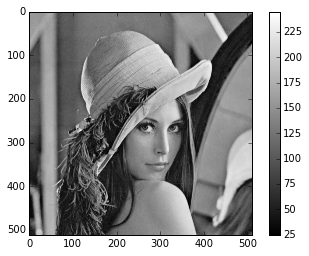

In [77]:
import scipy.misc
import matplotlib.pyplot as plt

# load already prepared ndarray from scipy
lena = scipy.misc.lena()

# set the default colormap to gray
plt.gray()

plt.imshow(lena)
plt.colorbar()
plt.show()

In [78]:
print lena.shape
print lena.max()
print lena.dtype

(512L, 512L)
245
int32


### Here we see that the image is:
 - 512 points wide and 512 points high
 - The max value in the whole array (that is, the image) is 254
 - Every point is represented as a little endian 32-bit long integer

### We could also read in an image using Python Imaging Library(PIL), which we installed in Chapter 1, Preparing Yout Working Environment

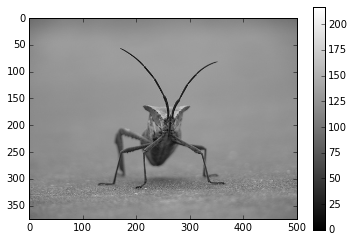

In [4]:
import numpy
import Image
import matplotlib.pyplot as plt

bug = Image.open('stinkbug.png')
arr = numpy.array(bug.getdata(), numpy.uint8).reshape(bug.size[1], bug.size[0], 3)

plt.gray()
plt.imshow(arr)
plt.colorbar()
plt.show()

In [10]:
import matplotlib.pyplot as plt
import scipy
import scipy.misc
import numpy

bug = scipy.misc.imread('stinkbug.png')

# if you want to inspect the shape of the loaded image
# uncomment following line
# print bug.shape

# the original image is RGB having values for all three
# shannels separately. We need to convert that to greyscale image
# by picking up just one channel.

# convert to gray
bug = bug[:,:,0]

array([[104, 104, 104, ..., 109, 109, 109],
       [105, 105, 105, ..., 109, 109, 109],
       [107, 106, 106, ..., 110, 110, 110],
       ..., 
       [112, 111, 110, ..., 116, 115, 115],
       [113, 113, 112, ..., 115, 114, 114],
       [113, 115, 115, ..., 114, 114, 113]], dtype=uint8)

※ Array Examples

a = array(5, 1, 2, 3, 4)

a[2:3]



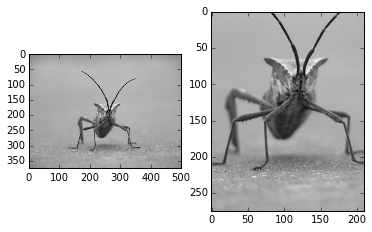

In [11]:
# show original image
plt.figure()
plt.gray()

plt.subplot(121)
plt.imshow(bug)

# show 'zoomed' region
zbug = bug[100:3500, 140:350]

plt. subplot(122)
plt.imshow(zbug)

plt.show()

For large images we recommend using numpy.memmap for memory mapping of images.
This will speed up manipulating the image data. For example:

In [ ]:
import numpy
file_name = 'stinkbug.png'
image = numpy.memmap(file_name, dtype=numpy.uint8, shape = (375,500))

## Generating controlled random datasets

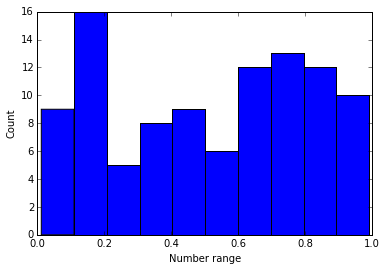

In [74]:
import pylab
import random

SAMPLE_SIZE = 100

# seed random generator
# if no argument provided
# uses system current time
random.seed()

# store generated random values here
real_rand_vars = []

# pick some random values
real_rand_vars = [random.random() for val in xrange(SAMPLE_SIZE)] # 수정 : SIZE -> SAMPLE_SIZE
# create histogram from data in 10 buckets
pylab.hist(real_rand_vars, 10)

# define x and y labels
pylab.xlabel("Number range")
pylab.ylabel("Count")

# show figure
pylab.show()

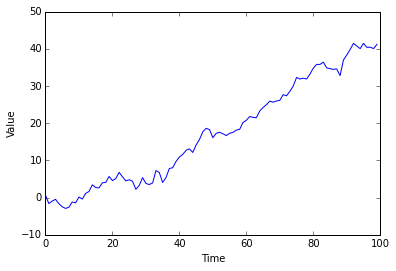

In [82]:
import pylab
import random

# days to generate data for
duration = 100
# mean value
mean_inc = 0.2

# standard deviation
std_dev_inc = 1.2

# time series
x = range(duration)
y = []
price_today = 0

for i in x:
    next_delta = random.normalvariate(mean_inc, std_dev_inc)
    price_today += next_delta
    y.append(price_today)
    
pylab.plot(x, y)
pylab.xlabel("Time")
pylab.ylabel("Value")
pylab.show()

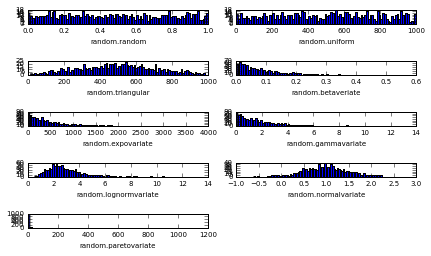

In [13]:
# coding: utf-8
import random
import matplotlib
import matplotlib.pyplot as plt

SAMPLE_SIZE = 1000

# histogram buckets
buckets = 100

plt.figure()

# we need to update font size just for this example
matplotlib.rcParams.update({'font.size': 7})

plt.subplot(621)
plt.xlabel("random.random")
# Return the next random floating point number in the range [0.0, 1.0).
res = [random.random() for _ in xrange(1, SAMPLE_SIZE)]
plt.hist(res, buckets) # ??? hi가 아니라 hist?

plt.subplot(622)
plt.xlabel("random.uniform")
# Return a random floating point number N such that a <= N <= b for a <= b and b <= N <= a for b < a
# The end-point value b may or may not be included in the range depending on floating-rounding in the equation a + (b-a) * random().
a = 1
b = SAMPLE_SIZE
res = [random.uniform(a, b) for _ in xrange(1, SAMPLE_SIZE)]
plt.hist(res, buckets)

plt.subplot(623)
plt.xlabel("random.triangular")
# Return a random floating point number N such that low <= N <= high and with the specified
# mode between those bounds. The low and high bounds default to zero and one.
# The mode argument defaults to rhe midpoint between the bounds, giving a symmetric distribution.
low = 1
high = SAMPLE_SIZE
res = [random.triangular(low, high) for _ in xrange(1, SAMPLE_SIZE)]
plt.hist(res, buckets)

plt.subplot(624)
plt.xlabel("random.betaveriate")
alpha = 1
beta = 10
res = [random.betavariate(alpha, beta) for _ in xrange(1, SAMPLE_SIZE)]
plt.hist(res, buckets)

plt.subplot(625)
plt.xlabel("random.expovariate")
lambd = 1.0 / ((SAMPLE_SIZE + 1) / 2. )
res = [random.expovariate(lambd) for _ in xrange(1, SAMPLE_SIZE)]
plt.hist(res, buckets)

plt.subplot(626)
plt.xlabel("random.gammavariate")
alpha = 1
beta = 2
res = [random.gammavariate(alpha, beta) for _ in xrange(1, SAMPLE_SIZE)]
plt.hist(res, buckets)

plt.subplot(627)
plt.xlabel("random.lognormvariate")
mu = 1
sigma = 0.5
res = [random.lognormvariate(mu, sigma) for _ in xrange(1, SAMPLE_SIZE)]
plt.hist(res, buckets)

plt.subplot(628)
plt.xlabel("random.normalvariate")
mu = 1
sigma = 0.5
res = [random.normalvariate(mu, sigma) for _ in xrange(1, SAMPLE_SIZE)]
plt.hist(res, buckets)

plt.subplot(629)
plt.xlabel("random.paretovariate")
alpha = 1
res = [random.paretovariate(alpha) for _ in xrange(1, SAMPLE_SIZE)]
plt.hist(res, buckets)

plt.tight_layout()
plt.show()

## Smoothing the noise in real-world data

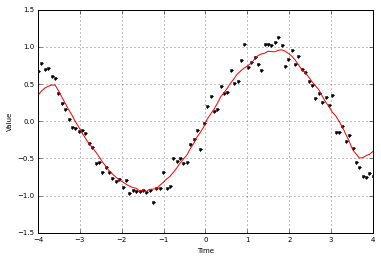

In [16]:
from pylab import *
from numpy import *

def moving_average(interval, window_size):
    '''
    Compute convoluted window for given size
    '''
    window = ones(int(window_size)) / float(window_size)
    return convolve(interval, window, 'same')

t = linspace(-4, 4, 100)
y = sin(t) + randn(len(t))*0.1

plot(t, y, "k.")

# conpute moving average
y_av = moving_average(y, 10)
plot(t, y_av, "r")
#xlim(0,1000)

xlabel("Time")
ylabel("Value")
grid(True)
show()

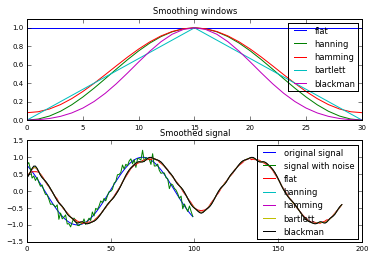

In [23]:
import numpy
from numpy import *
from pylab import *

# possible window type
WINDOWS = ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']
# if you want to see just two window type, comment previous line,
# and uncomment the following one
# WINDOWS = ['flat', 'hanning']

def smooth(x, window_len=11, window='hanning'):
    """
    Smooth the data using a window with requested size.
    Returns smoothed signal.
    
    x -- input signal
    window_len -- length of smoothing window
    window -- type of window: 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
              flat window will produce a moving average smoothing.
    """
    
    
    if x.ndim != 1:
        raise ValueError, "smooth only accepts 1 dimension arrays."
        
    if x.size < window_len:
        raise ValueError, "Input vector needs to be bigger than window size."
        
    if window_len < 3:
        return x
    
    if not window in WINDOWS:
        raise ValueError("Window is one of 'flat', 'hanning', 'hamming', barilett', 'blackman'")
    # adding reflected windows in front and at the end
    s=numpy.r_[x[window_len-1:0:-1], x, x[-1:window_len:-1]]
    # pick windows type and do averaging
    if window == 'flat': #moving average
        w = numpy.ones(window_len, 'd')
    else:
        # call appropriate function in numpy
        w = eval('numpy.' + window + '(window_len)')
        
    # NOTE: length(output) != length(inout), to correct this:
    # return y[(window_len/2-1):-(window_len/2)] indtead of just y.
    y = numpy.convolve(w/w.sum(), s, mode='valid')
    return y

# Get some evenly spaced numbers over a specified interval.
t = linspace(-4, 4, 100)

# Make some noisy sinusoidal
x = sin(t)
xn = x + randn(len(t))*0.1

# Smooth it
y = smooth(x)

# windows 
ws = 31

subplot(211)
plot(ones(ws))

# draw on the same axes
hold(True)

# plot for every windows
for w in WINDOWS[1:]:
    eval('plot('+w+'(ws) )')
    
# configure axis properties
axis([0, 30, 0, 1.1])

# add legend for every window
legend(WINDOWS)

title("Smoothing windows")

# add second plot
subplot(212)

# draw original signal
plot(x)

# and signal with added noise
plot(xn)

# smooth signal with noise for every possible windowing algorithm 
for w in WINDOWS:
    plot(smooth(xn, 10, w))
    
# add legend for every graph
l=['original signal', 'signal with noise']
l.extend(WINDOWS)
legend(l)

title("Smoothed signal")

show()